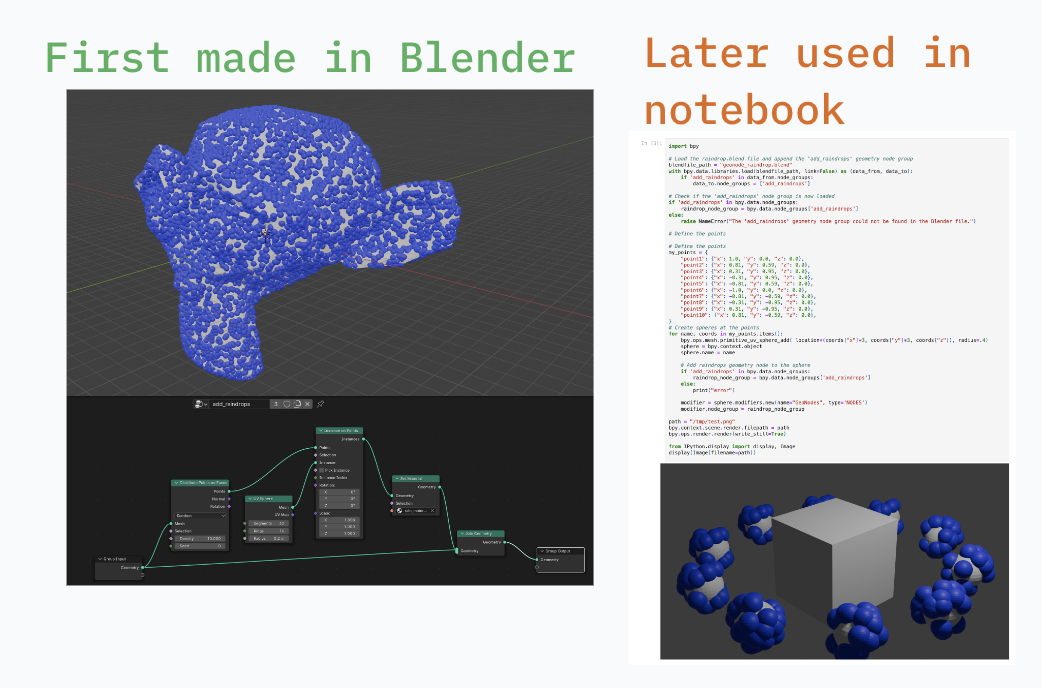

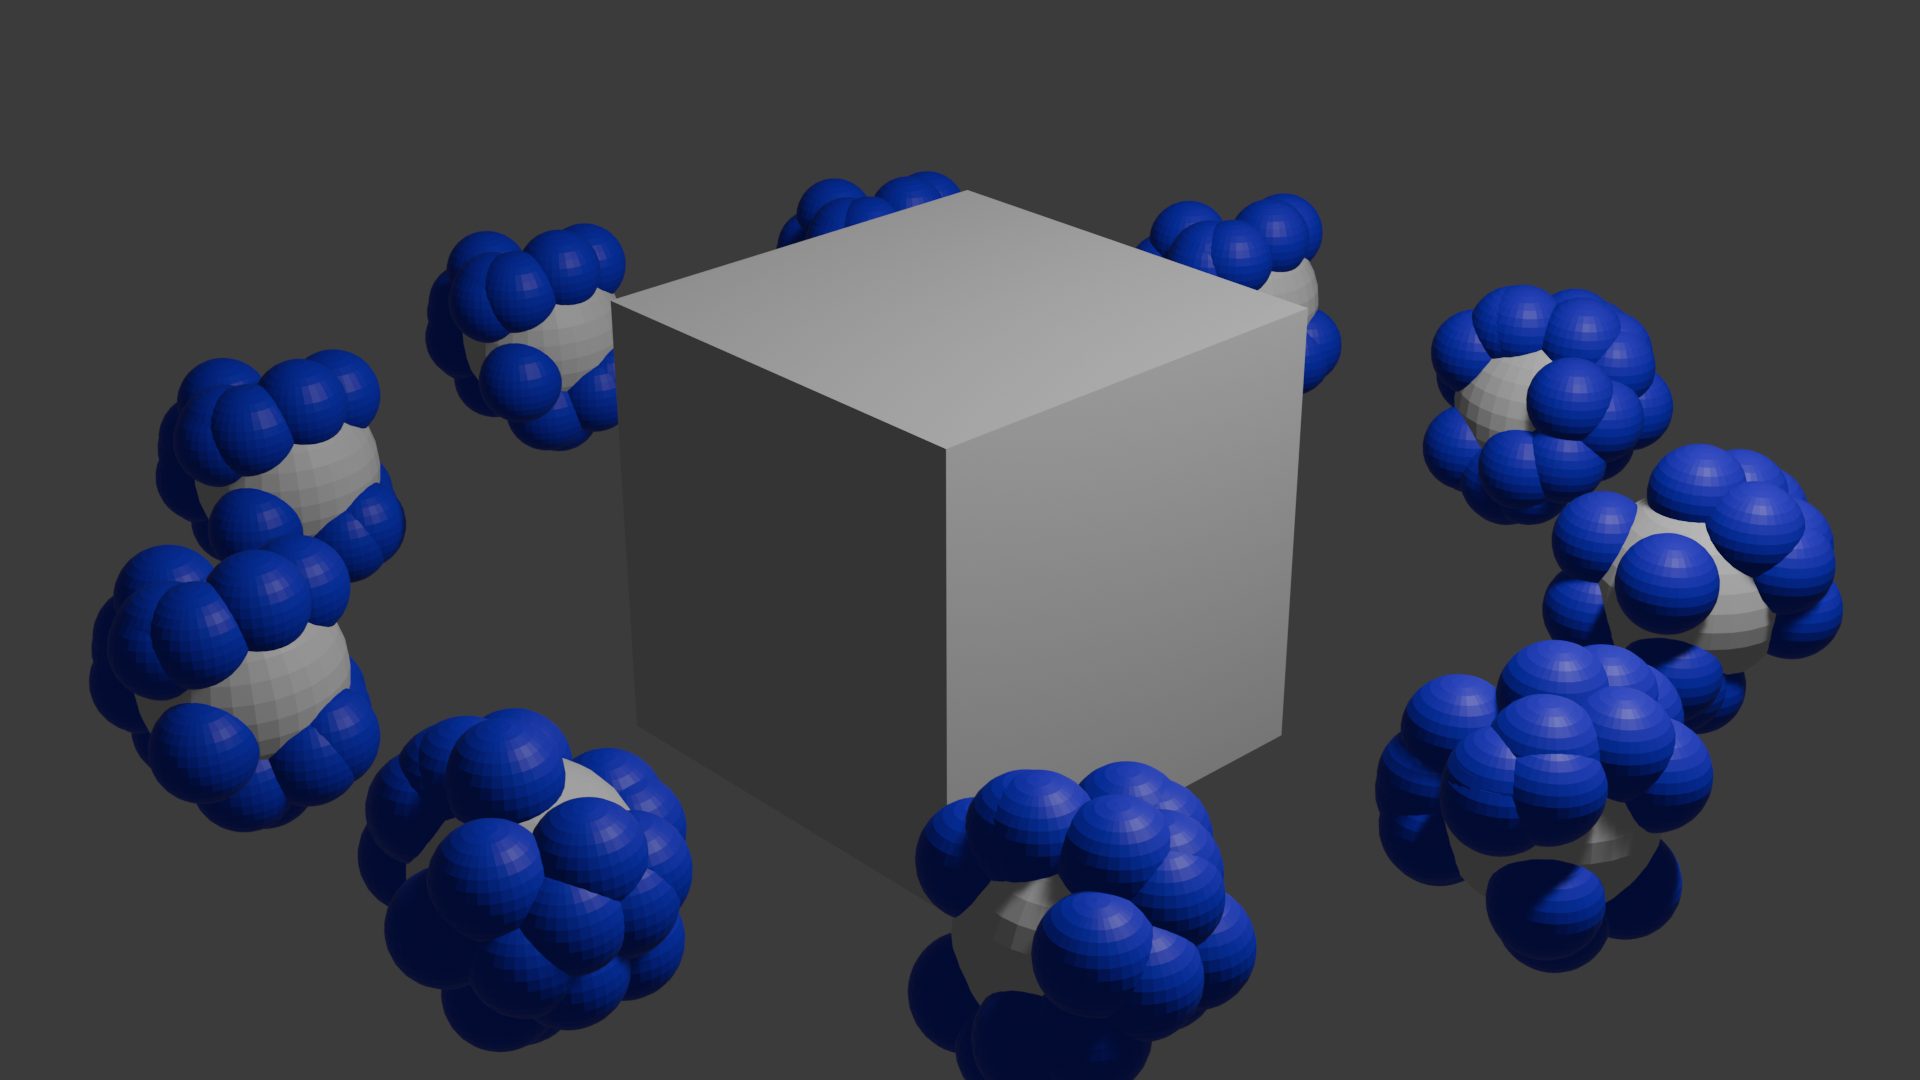

In [3]:


import bpy

# Load the raindrop.blend file and append the 'add_raindrops' geometry node group
blendfile_path = "geonode_raindrop.blend"
with bpy.data.libraries.load(blendfile_path, link=False) as (data_from, data_to):
    if 'add_raindrops' in data_from.node_groups:
        data_to.node_groups = ['add_raindrops']

# Check if the 'add_raindrops' node group is now loaded
if 'add_raindrops' in bpy.data.node_groups:
    raindrop_node_group = bpy.data.node_groups['add_raindrops']
else:
    raise NameError("The 'add_raindrops' geometry node group could not be found in the Blender file.")

# Define the points

# Define the points
my_points = {
    "point1": {"x": 1.0, "y": 0.0, "z": 0.0},
    "point2": {"x": 0.81, "y": 0.59, "z": 0.0},
    "point3": {"x": 0.31, "y": 0.95, "z": 0.0},
    "point4": {"x": -0.31, "y": 0.95, "z": 0.0},
    "point5": {"x": -0.81, "y": 0.59, "z": 0.0},
    "point6": {"x": -1.0, "y": 0.0, "z": 0.0},
    "point7": {"x": -0.81, "y": -0.59, "z": 0.0},
    "point8": {"x": -0.31, "y": -0.95, "z": 0.0},
    "point9": {"x": 0.31, "y": -0.95, "z": 0.0},
    "point10": {"x": 0.81, "y": -0.59, "z": 0.0},
}
# Create spheres at the points
for name, coords in my_points.items():
    bpy.ops.mesh.primitive_uv_sphere_add( location=(coords["x"]*3, coords["y"]*3, coords["z"]), radius=.4)
    sphere = bpy.context.object
    sphere.name = name

    # Add raindrops geometry node to the sphere
    if 'add_raindrops' in bpy.data.node_groups:
        raindrop_node_group = bpy.data.node_groups['add_raindrops']
    else:
        print("error")
    
    modifier = sphere.modifiers.new(name="GeoNodes", type='NODES')
    modifier.node_group = raindrop_node_group

path = "/tmp/test.png"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)

from IPython.display import display, Image
display(Image(filename=path))